# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [ ]:
!pip install smolagents

Let's also login to the Hugging Face Hub to have access to the Inference API.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [1]:
import os
from dotenv import load_dotenv
from smolagents import LiteLLMModel

# Carica il file .env
load_dotenv()

model=LiteLLMModel(
        model_id="gpt-4o-mini",  # ⭐ Modello OpenAI
        api_key=os.getenv("OPENAI_API_KEY")
    )

## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [2]:
from smolagents import CodeAgent, InferenceClientModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=model)

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o-mini ────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")                  
  print(catering_service)                                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 1.64 seconds| Input tokens: 1,988 | Output tokens: 65]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Catering Co.")                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 2: Duration 2.03 seconds| Input tokens: 4,126 | Output tokens: 117]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [3]:
from smolagents import Tool, CodeAgent, InferenceClientModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=model)

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o-mini ────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  theme_idea = superhero_party_theme_generator(category='villain masquerade')                                      
  print(theme_idea)                                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 1: Duration 1.51 seconds| Input tokens: 2,019 | Output tokens: 82]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.")      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 2: Duration 1.83 seconds| Input tokens: 4,217 | Output tokens: 176]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [4]:
party_theme_tool.push_to_hub("pandagan/catering_service_tool", token="###")

README.md:   0%|          | 0.00/241 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/pandagan/catering_service_tool/commit/00800818cd2c1cfd882d2ef566e6741ee24b1816', commit_message='Upload tool', commit_description='', oid='00800818cd2c1cfd882d2ef566e6741ee24b1816', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/pandagan/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='pandagan/catering_service_tool'), pr_revision=None, pr_num=None)

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

In [6]:
# Verifica le proprietà del tool
print(f"Tool info: {image_generation_tool}")
print(f"Tool attributes: {dir(image_generation_tool)}")

Tool info: <dynamic_tool.TextToImageTool object at 0x134db8220>
Tool attributes: ['__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_gradio_app_code', '_get_requirements', '_get_tool_code', '_initialize_hub_repo', '_prepare_hub_files', '_write_file', 'client', 'description', 'forward', 'from_code', 'from_dict', 'from_gradio', 'from_hub', 'from_langchain', 'from_space', 'inputs', 'is_initialized', 'model_sdxl', 'name', 'output_type', 'push_to_hub', 'save', 'setup', 'to_dict', 'validate_arguments']


In [7]:
# Vediamo che tipo di client usa
print(f"Client type: {type(image_generation_tool.client)}")
print(f"Model SDXL: {image_generation_tool.model_sdxl}")

Client type: <class 'huggingface_hub.inference._client.InferenceClient'>
Model SDXL: black-forest-labs/FLUX.1-schnell


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor with made-up superheroes. The scene is grand and     
  opulent, with chandeliers, red carpet, and elegant guests. The guests include a female superhero with powers of  
  time manipulation, a male superhero with the ability to shoot energy blasts, and a shape-shifting hero. The      
  decor is indulgent with gold accents, rich fabrics, and floating platforms. High-res, photorealistic."           
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1350C43A0>

[Step 1: Duration 12.63 seconds| Input tokens: 2,073 | Output tokens: 157]

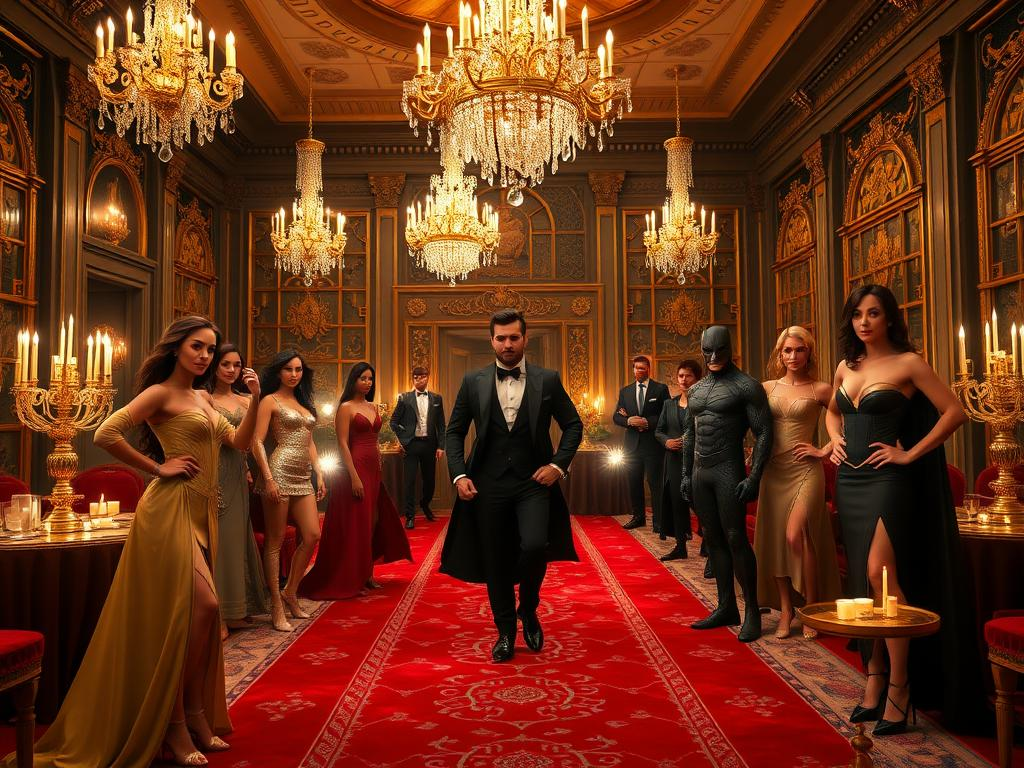

In [10]:
from smolagents import load_tool, CodeAgent, InferenceClientModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=InferenceClientModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [ ]:
!pip install gradio_client

In [11]:
from smolagents import CodeAgent, InferenceClientModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improving the prompt                                                                                           
  improved_prompt = "A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala. The   
  manor is decorated with iconic superhero symbols and costumes. Alfred, in his butler attire, supervises the      
  event with a smile. Superhero-themed food, drinks, and games are setup, attracting guests dressed in their       
  favorite superhero outfits. The atmosphere is festive yet sophisticated, filled with excitement and energy."     
  print("Improved Prompt:", improved_prompt)                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Improved Prompt: A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala. The manor 
is decorated with iconic superhero symbols and costumes. Alfred, in his butler attire, supervises the event with a 
smile. Superhero-themed food, drinks, and games are setup, attracting guests dressed in their favorite superhero 
outfits. The atmosphere is festive yet sophisticated, filled with excitement and energy.

Out: None

[Step 1: Duration 7.84 seconds| Input tokens: 2,071 | Output tokens: 142]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 
/private/var/folders/tl/zb5lzmw1379d6f96zdj440lm0000gn/T/gradio/4648527a0a8815ceb5cac345515ba86ba57e1244e63293e679e
d1728aec492bb/image.webp

[Step 2: Duration 11.70 seconds| Input tokens: 4,520 | Output tokens: 201]

'/private/var/folders/tl/zb5lzmw1379d6f96zdj440lm0000gn/T/gradio/4648527a0a8815ceb5cac345515ba86ba57e1244e63293e679ed1728aec492bb/image.webp'

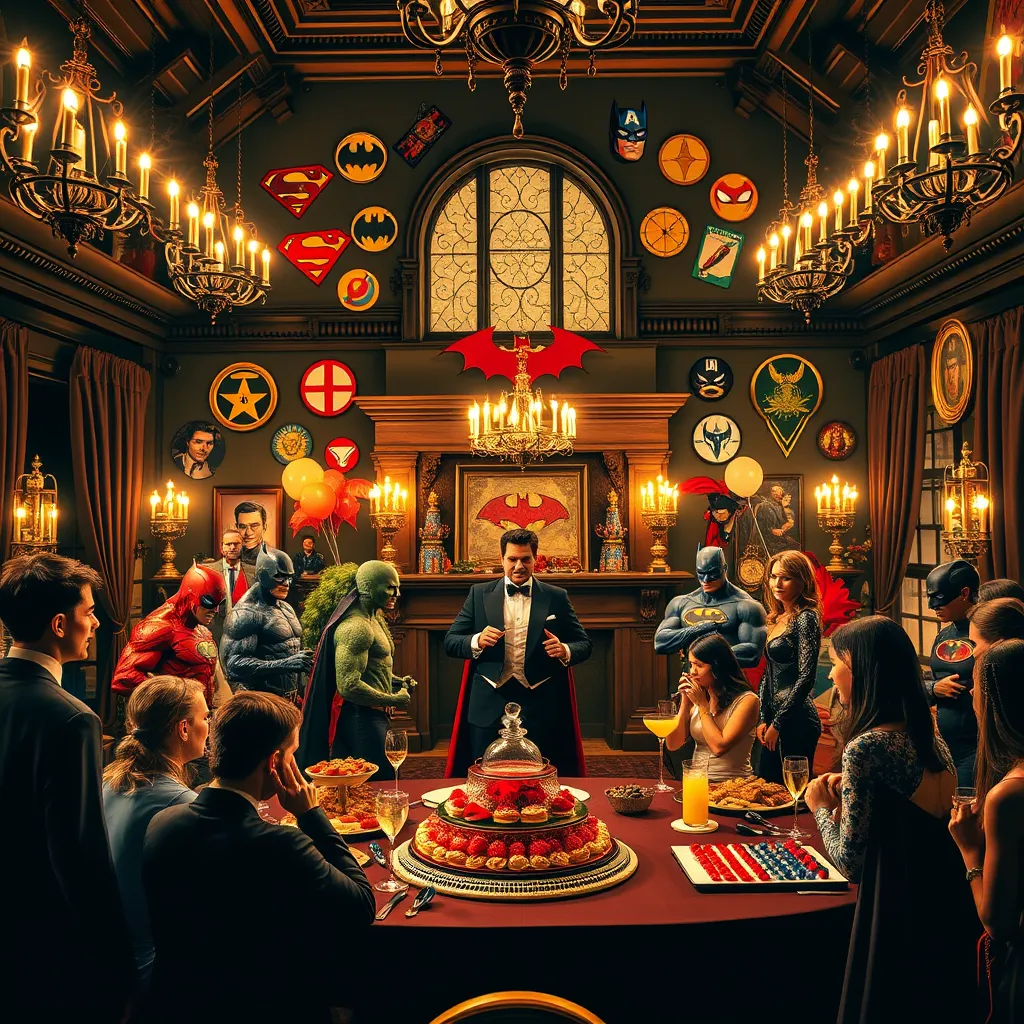

In [13]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/private/var/folders/tl/zb5lzmw1379d6f96zdj440lm0000gn/T/gradio/4648527a0a8815ceb5cac345515ba86ba57e1244e63293e679ed1728aec492bb/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

We’ll discuss the LangChain framework in upcoming sections. For now, we just note that we can reuse LangChain tools in your smolagents workflow!

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here’s how he does it:

In [ ]:
!pip install langchain-community google-search-results

In [16]:
# from google.colab import userdata
import os
load_dotenv()
# os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

SERP_API_KEY=os.getenv("SERPAPI_API_KEY")

In [17]:
from langchain.agents import load_tools
from smolagents import CodeAgent, InferenceClientModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment = search("luxury entertainment ideas for superhero-themed event")                           
  print(luxury_entertainment)                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Superman Theme Party · Superman Theme · Superman Party Decorations · Superman Party Game · Superman Baby Shower ·
Superman Birthday Party · Superman Party.', '23 Super Fun Superhero Event Theme ideas | superhero, new years eve 
events, corporate team building activities.', "Unleash your team's inner heroes with the ultimate superhero-themed 
event experience! From thrilling rides and immersive attractions to all-inclusive ...", 'Event Highlights: Hire a 
videographer to capture the highlights of the day, creating a short film that showcases the fun, laughter, and 
superhero spirit.', 'Your team can bond over themed obstacle courses and field games, enter a costume contest, or 
unleash their artistic side painting masks and making comics. Our ...', 'Here we are to save the day, with 
superhero party ideas on the way! Discover more great party ideas at SharingPartyIdeas.com!', 'I work for an event 
planner that organizes themed parties, mainly for kids birthdays and such. Today we had a superhero themed party, 
and this was the cake.', 'Top 5 Superhero Themed Party Ideas · Silent Disco Superhero Party · Classic Superhero 
Costume Party · Superhero Training Camp · Superhero Movie Marathon · Superhero ...', '100 pages of fun prints, 
pennants, cupcake wrappers, bottle labels, party hats, soda covers and everything in between.', "Our children's 
Superhero Party Entertainment includes a range of interactive games and activities, such as superhero training and 
bubble popping, musical games."]

Out: None

[Step 1: Duration 9.35 seconds| Input tokens: 2,050 | Output tokens: 63]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_refined = search("luxury superhero-themed event entertainment ideas live performances       
  interactive experiences")                                                                                        
  print(luxury_entertainment_refined)                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Below is a peek of our vibrant Experiential Division specializing in Interactive Art & Media Installations + 
Creative Games & Team building Activities.', 'We provide superhero training, princess activities, art parties, 
comedy and martial arts demonstrations! I am a working DJ with 10+ years of experience DJing ...', 'A Marvel-themed
family day is the perfect way to infuse energy, excitement, and camaraderie into your corporate event.', 'Dec 16, 
2013 - Explore Tablescapes By Design\'s board "SUPER HERO THEMED EVENTS" on Pinterest. See more ideas about 
superhero birthday party, superhero ...', 'Engage in action-packed activities, thrilling photo ops, and dynamic 
performances that bring superhero stories to life. Versatile Appearances. Perfect for ...', 'Have a Grand time 
during two days of fun activities, awesome events, and superhero surprises for the whole family.', 'Hip produced 
this spectacular, absolutely custom corporate holiday theme event with Marvel, Wonder Woman, Spiderman, Superman 
iconic Super Heroes.', "Unleash your team's inner heroes with the ultimate superhero-themed event experience! From 
thrilling rides and immersive attractions to all-inclusive ...", "We've prepared a list of 30 corporate party ideas
– from theme-based parties to interactive team-building activities.", 'Explore 29 conference entertainment ideas to
boost engagement, build connections, and create memorable experiences.']

Out: None

[Step 2: Duration 7.88 seconds| Input tokens: 4,547 | Output tokens: 145]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_superhero_entertainment = search("luxury superhero-themed live performances and interactive experiences   
  for events")                                                                                                     
  print(luxury_superhero_entertainment)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Why Choose Our Superhero-Themed Events? ✔️ Interactive performances that engage and entertain. ✔️ Professional 
cosplayers for a realistic experience.', 'Become a part of THE experience. You will smash villains as Hulk, fly as 
Iron Man, shoot energy beams with Vision, and scale buildings with Spidey!', 'Imagine a day where your colleagues 
and their families come together to celebrate, bond, and transform into their favorite superheroes.', "Our 
high-quality costumes and professional actors ensure that each superhero looks like they've stepped straight out of
a comic book, ready to defend the day!", 'Have a Grand time during two days of fun activities, awesome events, and 
superhero surprises for the whole family.', "Unleash your team's inner heroes with the ultimate superhero-themed 
event experience! From thrilling rides and immersive attractions to all-inclusive ...", 'We designed & produced 
multiple themed interactive activations & media zones for this Superhero themed event for a biotech company. Our 
Experiential ...', 'Hip produced this spectacular, absolutely custom corporate holiday theme event with Marvel, 
Wonder Woman, Spiderman, Superman iconic Super Heroes.', "Adaptable for mixed ages and suitable for up to 100 
guests, it's a fully interactive, magical party experience that superhero fans will love. We start with an ...", 
'Join us for an action-packed day celebrating all things heroic. Step into a world of adventure with 
family-friendly activities, performances, and special guest ...']

Out: None

[Step 3: Duration 7.45 seconds| Input tokens: 7,503 | Output tokens: 224]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Extracting relevant key points from the search results                                                         
  key_points = [                                                                                                   
      "Interactive performances that engage and entertain.",                                                       
      "Professional cosplayers for a realistic experience.",                                                       
      "Smashing villains as Hulk, flying as Iron Man, shooting energy beams with Vision, and scaling buildings     
  with Spidey.",                                                                                                   
      "High-quality costumes and professional actors ensure each superhero looks comic-book perfect.",             
      "Interactive activations & media zones designed and produced for a biotech company.",                        
      "Custom corporate holiday theme event with iconic superheroes.",                                             
      "Fully interactive, magical party experience adaptable for mixed ages, up to 100 guests.",                   
      "Action-packed day with family-friendly activities, performances, and special guest appearances."            
  ]                                                                                                                
                                                                                                                   
  # Joining the key points into a single string                                                                    
  luxury_entertainment_summary = "\n".join(key_points)                                                             
  print(luxury_entertainment_summary)                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Interactive performances that engage and entertain.
Professional cosplayers for a realistic experience.
Smashing villains as Hulk, flying as Iron Man, shooting energy beams with Vision, and scaling buildings with 
Spidey.
High-quality costumes and professional actors ensure each superhero looks comic-book perfect.
Interactive activations & media zones designed and produced for a biotech company.
Custom corporate holiday theme event with iconic superheroes.
Fully interactive, magical party experience adaptable for mixed ages, up to 100 guests.
Action-packed day with family-friendly activities, performances, and special guest appearances.

Out: None

[Step 4: Duration 31.89 seconds| Input tokens: 10,924 | Output tokens: 448]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = """Luxury Entertainment Ideas for a Superhero-Themed Event:                         
                                                                                                                   
  1. Interactive Performances:                                                                                     
     - Engaging and entertaining performances.                                                                     
     - Professional cosplayers providing a realistic experience.                                                   
     - Activities like smashing villains as Hulk, flying as Iron Man, shooting energy beams with Vision, and       
  scaling buildings as Spidey.                                                                                     
                                                                                                                   
  2. High-Quality Costumes and Professional Actors:                                                                
     - Ensuring each superhero looks like they've stepped straight out of a comic book.                            
                                                                                                                   
  3. Interactive Activations & Media Zones:                                                                        
     - Custom-designed and produced for events like those for a biotech company.                                   
                                                                                                                   
  4. Custom Corporate Holiday Theme Event:                                                                         
     - Featuring iconic superheroes.                                                                               
                                                                                                                   
  5. Fully Interactive Magical Party Experience:                                                                   
     - Adaptable for mixed ages, suitable for up to 100 guests.                                                    
                                                                                                                   
  6. Action-Packed Day:                                                                                            
     - Includes family-friendly activities, performances, and special guest appearances."""                        
                                                                                                                   
  final_answer(luxury_entertainment_ideas)                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Luxury Entertainment Ideas for a Superhero-Themed Event:

1. Interactive Performances:
   - Engaging and entertaining performances.
   - Professional cosplayers providing a realistic experience.
   - Activities like smashing villains as Hulk, flying as Iron Man, shooting energy beams with Vision, and scaling 
buildings as Spidey.

2. High-Quality Costumes and Professional Actors:
   - Ensuring each superhero looks like they've stepped straight out of a comic book.

3. Interactive Activations & Media Zones:
   - Custom-designed and produced for events like those for a biotech company.

4. Custom Corporate Holiday Theme Event:
   - Featuring iconic superheroes.

5. Fully Interactive Magical Party Experience:
   - Adaptable for mixed ages, suitable for up to 100 guests.

6. Action-Packed Day:
   - Includes family-friendly activities, performances, and special guest appearances.

[Step 5: Duration 15.98 seconds| Input tokens: 14,931 | Output tokens: 698]

"Luxury Entertainment Ideas for a Superhero-Themed Event:\n\n1. Interactive Performances:\n   - Engaging and entertaining performances.\n   - Professional cosplayers providing a realistic experience.\n   - Activities like smashing villains as Hulk, flying as Iron Man, shooting energy beams with Vision, and scaling buildings as Spidey.\n\n2. High-Quality Costumes and Professional Actors:\n   - Ensuring each superhero looks like they've stepped straight out of a comic book.\n\n3. Interactive Activations & Media Zones:\n   - Custom-designed and produced for events like those for a biotech company.\n\n4. Custom Corporate Holiday Theme Event:\n   - Featuring iconic superheroes.\n\n5. Fully Interactive Magical Party Experience:\n   - Adaptable for mixed ages, suitable for up to 100 guests.\n\n6. Action-Packed Day:\n   - Includes family-friendly activities, performances, and special guest appearances."

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉

## Importing a tool collection from any MCP server

`smolagents` also allows importing tools from the hundreds of MCP servers available on [glama.ai](https://glama.ai/mcp/servers) or [smithery.ai](https://smithery.ai/). If you want to dive deeper about MCP, you can check our [free MCP Course](https://huggingface.co/learn/mcp-course/).


In [ ]:
!pip install "smolagents[mcp]"


The MCP servers tools can be loaded in a ToolCollection object as follow:



In [19]:
import os
from smolagents import ToolCollection, CodeAgent
from mcp import StdioServerParameters
from smolagents import InferenceClientModel


model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")


server_parameters = StdioServerParameters(
    command="uvx",
    args=["--quiet", "pubmedmcp@0.1.3"],
    env={"UV_PYTHON": "3.12", **os.environ},
)

with ToolCollection.from_mcp(server_parameters, trust_remote_code=True) as tool_collection:
    agent = CodeAgent(tools=[*tool_collection.tools], model=model, add_base_tools=True)
    agent.run("Please find a remedy for hangover.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Please find a remedy for hangover.                                                                              │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  hangover_remedies = web_search(query="hangover remedies")                                                        
  print(hangover_remedies)                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[7 ways to cure your hangover - Harvard 
Health](https://www.health.harvard.edu/staying-healthy/7-ways-to-cure-your-hangover)
Learn the causes of hangovers and how to prevent and relieve the symptoms with simple tips. Find out which drinks, 
foods, and supplements may help, and which ones to avoid.

[Hangover Cures: Effective Home Remedies (Supported by Science) - 
WebMD](https://www.webmd.com/balance/hangover-cure)
Learn what causes a hangover and how to ease its symptoms with water, rest, and Korean pear juice. Find out why 
other remedies like vitamin B, pickle juice, and IV fluids may not work as well.

[16 Science-Backed Ways to Get Rid of a Hangover Faster - wikiHow](https://www.wikihow.com/Get-Rid-of-a-Hangover)
In the end, the most surefire cure for your hangover is time, so if you can kill a little bit of that time sleeping
— all the better. Make sure that the room is dim or dark: the light can make you feel worse. Advertisement. 12. 
Take an easy walk. Download Article. If you can, try to get out of the house and take a walk. ...

[How to Get Rid of a Hangover: 9 Home Remedies - Dr. Axe](https://draxe.com/health/how-to-get-rid-of-a-hangover/)
Learn about the causes, symptoms and dangers of a hangover and how to prevent or treat it naturally. Find out which
foods, drinks and supplements can help you rehydrate, replenish electrolytes, ease nausea and headache, and more.

[7 Best Hangover Cures and Remedies - How to Cure a 
Hangover](https://www.goodhousekeeping.com/health/a33995444/best-hangover-cures-remedies/)
To find the best ways to tackle every morning-after symptom that might come your way, we consulted various experts 
on which remedies from your handy hangover kit actually work (and which really ...

[Hangover Symptoms, Remedies & Prevention - Cleveland 
Clinic](https://my.clevelandclinic.org/health/diseases/16627-hangover)
Learn what causes a hangover and how to prevent or treat it. Find out the best hangover cure, such as drinking 
water, eating bland foods and taking NSAIDs.

[The 10 Best Hangover Cures and Natural Remedies - Business 
Insider](https://www.businessinsider.com/guides/health/treatments/hangover-cure?op=1)
A 2016 review of natural remedies for hangovers suggests Pyrus pyrifolia, or Korean pear, can help treat hangover 
symptoms and reduce the amount of alcohol in your blood. It is important to note ...

[12 Home Remedies for Hangover & Self-Care Tips - 
eMediHealth](https://www.emedihealth.com/nutrition/home-remedies-for-hangover)
Best Home Remedies for Hangover Relief. Here are some tried-and-tested remedies to get rid of a hangover more 
quickly. 1. Drink more water. Alcohol functions as a diuretic, which means it increases urine output and therefore 
makes your body lose more water. It does so by suppressing the release of a hormone called vasopressin, which helps
your ...

[The 6 Best Ways to Prevent (and Cure) a Hangover - 
Healthline](https://www.healthline.com/nutrition/best-hangover-cures)
Learn how to avoid drinks with congeners, stay hydrated, get enough sleep, eat a good breakfast, and try certain 
supplements to ease a hangover. Find out which foods and beverages may help or worsen your symptoms and why.

[7 Ways To Combat a Hangover - Verywell Health](https://www.verywellhealth.com/7-ways-to-combat-a-hangover-5090147)
7 Hangover Remedies to Try . You might have heard suggestions like a late-night fast food run or a trendy remedy 
like activated charcoal to deal with a hangover. You won't find those tips on the list, but here are seven 
science-backed ways to lessen the symptoms of a hangover.

Out: None

[Step 1: Duration 4.80 seconds| Input tokens: 2,431 | Output tokens: 62]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("The most effective hangover remedies include drinking plenty of water, getting adequate rest,      
  eating bland foods, replenishing electrolytes, and consuming Korean pear juice. These methods are supported by   
  multiple sources and can help alleviate hangover symptoms.")                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: The most effective hangover remedies include drinking plenty of water, getting adequate rest, 
eating bland foods, replenishing electrolytes, and consuming Korean pear juice. These methods are supported by 
multiple sources and can help alleviate hangover symptoms.

[Step 2: Duration 6.90 seconds| Input tokens: 5,906 | Output tokens: 172]